# Refined Stratified Sampling Example 3

- Author: Mohit S. Chauhan 
- Date: June 30, 2020

In this example, Stratified sampling is used to generate samples from Uniform distribution and sample expnsion is done adaptively using Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the STS, RSS and Krig class from UQpy.


In [1]:
from UQpy.sampling import TrueStratifiedSampling, RefinedStratifiedSampling
from UQpy.surrogates import Kriging
from UQpy.RunModel import RunModel
from UQpy.distributions import Uniform
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.patches as patches
import numpy as np
from UQpy.sampling.stratified_sampling.strata import RectangularStrata
from UQpy.optimization.MinimizeOptimizer import MinimizeOptimizer

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.List[typing.Callable] deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecate

Create a distribution object.

In [2]:
marginals = [Uniform(loc=0., scale=1.), Uniform(loc=0., scale=1.)]

Create a strata object.

In [3]:
strata = RectangularStrata(strata_number=[4, 4])

Run stratified sampling.

In [4]:
x = TrueStratifiedSampling(distributions=marginals, strata_object=strata, nsamples_per_stratum=1, random_state=1)
initial_samples=x.samples.copy()

This plot shows the samples and stratas generated by the STS class.

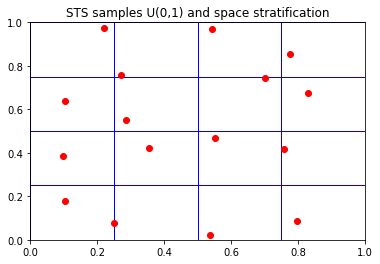

In [5]:
fig1 = x.strata_object.plot_2d()
plt.title("STS samples U(0,1) and space stratification")
plt.plot(x.samples[:16, 0], x.samples[:16, 1], 'ro')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

RunModel class is used to estimate the function value at sample points generated using STS class.

In [6]:
rmodel = RunModel(model_script='python_model_function.py', vec=False)

This figure shows the actual function defined in python model script.

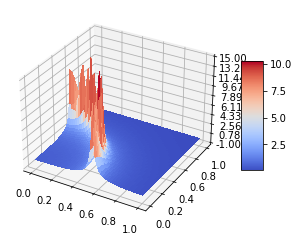

In [7]:
rmodel1 = RunModel(model_script='python_model_function.py', vec=False)
rmodel1.run(samples=x.samples)
num = 50
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y_act = np.zeros([num, num])
r1model = RunModel(model_script='python_model_function.py')
for i in range(num):
    for j in range(num):
        r1model.run(samples=np.array([[x1v[i, j], x2v[i, j]]]), append_samples=False)
        y_act[i, j] = r1model.qoi_list[0]
        
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
# Plot for estimated values
surf = ax1.plot_surface(x1v, x2v, y_act, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax1.set_zlim(-1, 15)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Krig class generated a surrogate model using STS samples and function value at those points.

In [8]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Exponential
K = Kriging(regression_model=Linear(), correlation_model=Exponential(), optimizer=MinimizeOptimizer(method="L-BFGS-B"),
            optimizations_number=20, correlation_model_parameters=[1, 1])
K.fit(samples=x.samples, values=rmodel1.qoi_list)
print(K.correlation_model_parameters)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40249D+01    |proj g|=  2.62565D+00

At iterate    1    f=  2.16861D+01    |proj g|=  2.21272D-01

At iterate    2    f=  2.03748D+01    |proj g|=  1.77093D+00

At iterate    3    f=  2.03631D+01    |proj g|=  1.06030D-01

At iterate    4    f=  2.03593D+01    |proj g|=  9.98875D-02

At iterate    5    f=  2.03558D+01    |proj g|=  3.60282D-01

At iterate    6    f=  2.03525D+01    |proj g|=  4.88691D-01

At iterate    7    f=  2.03461D+01    |proj g|=  2.21094D-01

At iterate    8    f=  2.03454D+01    |proj g|=  6.98602D-02

At iterate    9    f=  2.03454D+01    |proj g|=  7.59689D-03
True
At iterate   10    f=  2.03454D+01    |proj g|=  1.01122D-04

[ 1.00221737 75.49022649]

At iterate   11    f=  2.03454D+01    |proj g|=  4.95015D-06

           * * *

Tit   = total number of iterations
Tnf 

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,


This figure shows the surrogate model generated using Krig class from initial samples.

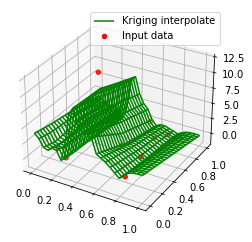

In [9]:
num = 25
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = K.predict(np.array([x1v[i, j], x2v[i, j]]))

fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
# Plot for estimated values
kr = ax2.plot_wireframe(x1v, x2v, y, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = ax2.scatter3D(x.samples[:, 0], x.samples[:, 1], rmodel1.qoi_list, color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()

A RSS class object is initiated by using the STS, RunModel and Krig object.

In [10]:
from UQpy.sampling import GradientEnhancedRefinement
refinement = GradientEnhancedRefinement(strata=strata, runmodel_object=rmodel, surrogate=K)
z = RefinedStratifiedSampling(stratified_sampling=x, refinement_algorithm=refinement, random_state=2)

After initiating the RSS class object, new samples are generated using the RSS.sample method.

In [11]:
z.run(nsamples=50)

TrueRUNNING THE L-BFGS-B CODE

           * * *


[1.04378226 1.00794334]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03454D+01    |proj g|=  5.56071D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.561D-07   2.035D+01
  F =   20.345406392955059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bound


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


At iterate    6    f=  2.14535D+01    |proj g|=  4.88192D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     42      8     2     1   4.882D-06   2.145D+01
  F =   21.453546021424106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
True
[1.00314720e+00 8.15809105e+03]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17138D+01    |proj g|=  4.08974-102

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

At iterate   11    f=  2.20103D+01    |proj g|=  2.99052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     21     11     1     0   2.991D-05   2.201D+01
  F =   22.010315050328181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34875D+01    |proj g|=  5.24297D-01

At iterate    1    f=  2.32456D+01    |proj g|=  3.20509D-01

At iterate    2    f=  2.30482D+01    |proj g|=  1.60592D-01

At itera

At iterate    6    f=  2.59000D+01    |proj g|=  9.18369D-03

At iterate    7    f=  2.58939D+01    |proj g|=  4.67607D-03

At iterate    8    f=  2.58903D+01    |proj g|=  2.37461D-03

At iterate    9    f=  2.58881D+01    |proj g|=  1.19370D-03

At iterate   10    f=  2.58868D+01    |proj g|=  5.89406D-04

At iterate   11    f=  2.58860D+01    |proj g|=  2.83790D-04

At iterate   12    f=  2.58856D+01    |proj g|=  1.32457D-04

At iterate   13    f=  2.58854D+01    |proj g|=  6.47003D-05

At iterate   14    f=  2.58853D+01    |proj g|=  3.47451D-05

At iterate   15    f=  2.58853D+01    |proj g|=  1.92693D-05

At iterate   16    f=  2.58852D+01    |proj g|=  1.13044D-05

At iterate   17    f=  2.58781D+01    |proj g|=  1.04340D-03

At iterate   18    f=  2.58781D+01    |proj g|=  4.75889D-04

At iterate   19    f=  2.58751D+01    |proj g|=  5.51940D-03

At iterate   20    f=  2.58744D+01    |proj g|=  1.63590D-02
  Positive dir derivative in projection 
  Using the backtracking step 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95225D+01    |proj g|=  2.03641D+00

At iterate    1    f=  2.74055D+01    |proj g|=  2.44208D-01

At iterate    2    f=  2.73293D+01    |proj g|=  1.84299D-01

At iterate    3    f=  2.72016D+01    |proj g|=  8.40551D-02

At iterate    4    f=  2.71523D+01    |proj g|=  4.88872D-02

At iterate    5    f=  2.71013D+01    |proj g|=  3.43913D-02

At iterate    6    f=  2.63878D+01    |proj g|=  3.09937D-01

At iterate    7    f=  2.63847D+01    |proj g|=  1.61022D-01

At iterate    8    f=  2.63763D+01    |proj g|=  6.64390D-02

At iterate    9    f=  2.63563D+01    |proj g|=  1.22214D-01

At iterate   10    f=  2.63508D+01    |proj g|=  1.23508D-01
True
At iterate   11    f=  2.63502D+01    |proj g|=  7.23488D-03

At iterate   12    f=  2.63501D+01    |proj g|=  4.89518D-04

At iterate   13    f= 


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


True

[  1.00149979 153.07572792]
At iterate    5    f=  2.86142D+01    |proj g|=  8.43812D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     33      7     2     1   8.438D-06   2.861D+01
  F =   28.614232538052278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88699D+01    |proj g|=  8.06050D-02

At iterate    1    f=  2.88640D+01    |proj g|=  6.75936D-02

At iterate    2    f=  2.88453D+01  


At iterate    2    f=  3.01495D+01    |proj g|=  4.03464D-03
  ys=-2.846E+00  -gs= 4.794E-03 BFGS update SKIPPED

At iterate    3    f=  3.01302D+01    |proj g|=  3.02060D-03

At iterate    4    f=  3.00966D+01    |proj g|=  4.39315D-01

At iterate    5    f=  3.00159D+01    |proj g|=  6.05658D-01

At iterate    6    f=  3.00114D+01    |proj g|=  8.43485D-02

At iterate    7    f=  3.00079D+01    |proj g|=  6.29369D-03

At iterate    8    f=  3.00025D+01    |proj g|=  2.99196D-01

At iterate    9    f=  2.99972D+01    |proj g|=  7.43158D-01

At iterate   10    f=  2.99911D+01    |proj g|=  1.03269D+00

At iterate   11    f=  2.99774D+01    |proj g|=  1.37611D+00

At iterate   12    f=  2.99274D+01    |proj g|=  7.35804D-01

At iterate   13    f=  2.99055D+01    |proj g|=  1.67289D-01

At iterate   14    f=  2.99053D+01    |proj g|=  1.43564D-01

At iterate   15    f=  2.99040D+01    |proj g|=  4.03887D-02
True
At iterate   16    f=  2.99039D+01    |proj g|=  5.62893D-03

At iterate   


At iterate    1    f=  3.12079D+01    |proj g|=  2.21581D-03

At iterate    2    f=  3.12079D+01    |proj g|=  5.54429D-03

At iterate    3    f=  3.12079D+01    |proj g|=  1.66312D-02

At iterate    4    f=  3.12077D+01    |proj g|=  4.06684D-02

At iterate    5    f=  3.12074D+01    |proj g|=  6.98849D-02

At iterate    6    f=  3.12066D+01    |proj g|=  9.60937D-02

At iterate    7    f=  3.12059D+01    |proj g|=  7.82019D-02

At iterate    8    f=  3.12056D+01    |proj g|=  3.06377D-02

At iterate    9    f=  3.12055D+01    |proj g|=  2.94104D-03

At iterate   10    f=  3.12055D+01    |proj g|=  1.03044D-04
True

[ 18963.01117019 297615.04327805]
At iterate   11    f=  3.12055D+01    |proj g|=  5.10806D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = no

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29135D+01    |proj g|=  3.00506-122

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.005-122   3.291D+01
  F =   32.913500083615197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
TrueRUNNING THE L-BFGS-B CODE

           * * *

[1.1780074  1.20386288]

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3

At iterate    5    f=  3.42014D+01    |proj g|=  3.96266D-02

At iterate    6    f=  3.41598D+01    |proj g|=  2.16986D-02

At iterate    7    f=  3.41087D+01    |proj g|=  2.69277D-02

At iterate    8    f=  3.40254D+01    |proj g|=  6.30028D-02

At iterate    9    f=  3.40253D+01    |proj g|=  6.46770D-02

At iterate   10    f=  3.39712D+01    |proj g|=  4.69197D-02

At iterate   11    f=  3.39640D+01    |proj g|=  6.45485D-03

At iterate   12    f=  3.39636D+01    |proj g|=  3.97064D-03

At iterate   13    f=  3.39636D+01    |proj g|=  3.25208D-03

At iterate   14    f=  3.39636D+01    |proj g|=  8.10051D-05
True

[401.19068942   1.01207914]
At iterate   15    f=  3.39636D+01    |proj g|=  2.14946D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of t


At iterate    6    f=  3.54286D+01    |proj g|=  2.12834D-02

At iterate    7    f=  3.53702D+01    |proj g|=  3.14216D-02

At iterate    8    f=  3.53010D+01    |proj g|=  6.50854D-02

At iterate    9    f=  3.52563D+01    |proj g|=  4.55630D-02

At iterate   10    f=  3.52456D+01    |proj g|=  7.62747D-03

At iterate   11    f=  3.52300D+01    |proj g|=  4.14542D-02

At iterate   12    f=  3.52282D+01    |proj g|=  1.75386D-02

At iterate   13    f=  3.52271D+01    |proj g|=  5.01727D-03

At iterate   14    f=  3.52270D+01    |proj g|=  1.41770D-03

At iterate   15    f=  3.52270D+01    |proj g|=  7.47725D-05
True

At iterate   16    f=  3.52270D+01    |proj g|=  1.56072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient


At iterate   10    f=  3.81167D+01    |proj g|=  9.18015D-03

At iterate   11    f=  3.81150D+01    |proj g|=  8.14822D-03

At iterate   12    f=  3.81111D+01    |proj g|=  2.67857D-03

At iterate   13    f=  3.81108D+01    |proj g|=  2.32400D-03

At iterate   14    f=  3.81106D+01    |proj g|=  2.12241D-04

At iterate   15    f=  3.81106D+01    |proj g|=  1.06274D-05
True

At iterate   16    f=  3.81106D+01    |proj g|=  3.75386D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     27     16     0     0   3.754D-07   3.811D+01
  F =   38.110637477030494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PG


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.

 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83032D+01    |proj g|=  1.22568D-03

At iterate    1    f=  3.83032D+01    |proj g|=  1.22278D-03

At iterate    2    f=  3.83028D+01    |proj g|=  4.53255D-04

At iterate    3    f=  3.83027D+01    |proj g|=  2.54602D-04

At iterate    4    f=  3.83026D+01    |proj g|=  1.23150D-04

At iterate    5    f=  3.83025D+01    |proj g|=  6.35615D-05

At iterate    6    f=  3.83025D+01    |proj g|=  3.23181D-05

At iterate    7    f=  3.83025D+01    |proj g|=  1.67565D-05
True

[1.07749269e+00 3.17234856e+05]
At iterate    8    f=  3.83025D+01    |proj g|=  8.78175D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at 

At iterate    7    f=  3.93748D+01    |proj g|=  1.92326D-01

At iterate    8    f=  3.93743D+01    |proj g|=  3.12966D-01

At iterate    9    f=  3.93732D+01    |proj g|=  4.52674D-01

At iterate   10    f=  3.93712D+01    |proj g|=  5.06165D-01

At iterate   11    f=  3.93693D+01    |proj g|=  3.33990D-01

At iterate   12    f=  3.93686D+01    |proj g|=  1.19388D-01

At iterate   13    f=  3.93685D+01    |proj g|=  2.42489D-02

At iterate   14    f=  3.93685D+01    |proj g|=  7.49191D-05

At iterate   15    f=  3.93685D+01    |proj g|=  4.92259D-04
True

[4.51091404e+04 1.09406445e+00]
At iterate   16    f=  3.93685D+01    |proj g|=  9.26100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



At iterate   15    f=  4.09248D+01    |proj g|=  1.31911D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     27     16     1     0   1.319D-06   4.092D+01
  F =   40.924789371338079     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
[5592565.46739269 2783715.45878722]
TrueRUNNING THE L-BFGS-B CODE

           * * *


[4.18211782e+04 1.04774898e+00]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23625D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   

At iterate    3    f=  4.36634D+01    |proj g|=  7.97293D-02

At iterate    4    f=  4.36066D+01    |proj g|=  3.92521D-02

At iterate    5    f=  4.35816D+01    |proj g|=  1.68835D-02

At iterate    6    f=  4.35742D+01    |proj g|=  6.94938D-03

At iterate    7    f=  4.35725D+01    |proj g|=  2.63163D-03

At iterate    8    f=  4.35722D+01    |proj g|=  1.16066D-03

At iterate    9    f=  4.35719D+01    |proj g|=  2.22425D-03

At iterate   10    f=  4.35197D+01    |proj g|=  1.73340D-02
  ys=-9.796E-04  -gs= 1.168E-02 BFGS update SKIPPED

At iterate   11    f=  4.35181D+01    |proj g|=  3.30143D-02

At iterate   12    f=  4.34975D+01    |proj g|=  3.44714D-02

At iterate   13    f=  4.34961D+01    |proj g|=  1.74696D-02

At iterate   14    f=  4.34947D+01    |proj g|=  4.83419D-03

At iterate   15    f=  4.34946D+01    |proj g|=  2.04948D-03

At iterate   16    f=  4.34946D+01    |proj g|=  1.85314D-04

At iterate   17    f=  4.34946D+01    |proj g|=  1.04223D-05
True

[4102.6453654


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


TrueRUNNING THE L-BFGS-B CODE

           * * *


[2.11819234e+05 1.20283114e+00]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36690D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00   4.367D+01
  F =   43.669036902107251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
TrueRUNNING THE L-BFGS-B CODE

           * * *


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly


At iterate   13    f=  4.38831D+01    |proj g|=  2.11150D+01
  ys=-1.442E-02  -gs= 3.589E-01 BFGS update SKIPPED

At iterate   14    f=  4.38380D+01    |proj g|=  1.99372D+01

At iterate   15    f=  4.35154D+01    |proj g|=  7.26729D-01

At iterate   16    f=  4.34426D+01    |proj g|=  7.22669D-01

At iterate   17    f=  4.34340D+01    |proj g|=  6.54079D-01

At iterate   18    f=  4.34327D+01    |proj g|=  4.98676D-01

At iterate   19    f=  4.34308D+01    |proj g|=  5.98194D-02

At iterate   20    f=  4.34308D+01    |proj g|=  6.74844D-03

At iterate   21    f=  4.34308D+01    |proj g|=  7.19179D-05
True

[ 1.00955191 41.41758445]
At iterate   22    f=  4.34308D+01    |proj g|=  7.80482D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final pr


At iterate    8    f=  4.57657D+01    |proj g|=  2.94447D-02

At iterate    9    f=  4.57610D+01    |proj g|=  8.05548D-02

At iterate   10    f=  4.57583D+01    |proj g|=  4.51916D-02

At iterate   11    f=  4.57381D+01    |proj g|=  2.70012D-02

At iterate   12    f=  4.57267D+01    |proj g|=  3.72060D-03

At iterate   13    f=  4.57265D+01    |proj g|=  3.44091D-03

At iterate   14    f=  4.57264D+01    |proj g|=  3.47676D-04
True

[1253.60387091  402.57440933]
At iterate   15    f=  4.57264D+01    |proj g|=  6.30589D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     23     15     0     0   6.306D-0


At iterate   11    f=  4.58610D+01    |proj g|=  2.07232D-02

At iterate   12    f=  4.58605D+01    |proj g|=  2.78721D-03

At iterate   13    f=  4.58605D+01    |proj g|=  1.02659D-04
True

At iterate   14    f=  4.58605D+01    |proj g|=  2.59260D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     18     14     0     0   2.593D-06   4.586D+01
  F =   45.860459599235590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
[25.18598804  1.47206461]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are


At iterate    6    f=  4.88522D+01    |proj g|=  5.83153D-02

At iterate    7    f=  4.88459D+01    |proj g|=  8.18490D-03

At iterate    8    f=  4.88446D+01    |proj g|=  1.16731D-03

At iterate    9    f=  4.88444D+01    |proj g|=  2.67405D-03

At iterate   10    f=  4.88444D+01    |proj g|=  1.35958D-03

At iterate   11    f=  4.88444D+01    |proj g|=  4.88209D-05
True

[5.99394219e+04 1.00293359e+00]
At iterate   12    f=  4.88444D+01    |proj g|=  4.36927D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     23     12     1     0   4.369D-06   4.884D+01
  F =   48.844361326611100     

CONVERGENCE: 


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  4.86741D+01    |proj g|=  3.31081D-01

At iterate    6    f=  4.84879D+01    |proj g|=  5.31216D-01

At iterate    7    f=  4.84135D+01    |proj g|=  4.22083D-01

At iterate    8    f=  4.83426D+01    |proj g|=  7.97771D-02

At iterate    9    f=  4.83386D+01    |proj g|=  2.59258D-02

At iterate   10    f=  4.83381D+01    |proj g|=  1.12613D-03

At iterate   11    f=  4.83381D+01    |proj g|=  9.80688D-05
True

[1.44437174 1.01915541]
At iterate   12    f=  4.83381D+01    |proj g|=  2.34878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     16     12     0     0   2.349D-06   4.


At iterate   10    f=  5.02948D+01    |proj g|=  9.04332D-03

At iterate   11    f=  5.02948D+01    |proj g|=  1.54331D-02

At iterate   12    f=  5.02947D+01    |proj g|=  2.54062D-02

At iterate   13    f=  5.02946D+01    |proj g|=  4.05570D-02

At iterate   14    f=  5.02943D+01    |proj g|=  6.24147D-02

At iterate   15    f=  5.02935D+01    |proj g|=  9.10724D-02

At iterate   16    f=  5.02919D+01    |proj g|=  1.22713D-01

At iterate   17    f=  5.02888D+01    |proj g|=  1.48096D-01

At iterate   18    f=  5.02838D+01    |proj g|=  1.51691D-01

At iterate   19    f=  5.02763D+01    |proj g|=  1.03632D-02

At iterate   20    f=  5.02760D+01    |proj g|=  2.44528D-02

At iterate   21    f=  5.02758D+01    |proj g|=  1.40364D-02

At iterate   22    f=  5.02757D+01    |proj g|=  1.49535D-03

At iterate   23    f=  5.02757D+01    |proj g|=  4.38177D-05
True

[1.1814533  5.22162457]
At iterate   24    f=  5.02757D+01    |proj g|=  3.94111D-05

           * * *

Tit   = total number o


At iterate    5    f=  5.18037D+01    |proj g|=  5.29721D-03

At iterate    6    f=  5.18031D+01    |proj g|=  5.24507D-03

At iterate    7    f=  5.18018D+01    |proj g|=  8.15252D-03

At iterate    8    f=  5.17985D+01    |proj g|=  1.62238D-02

At iterate    9    f=  5.17889D+01    |proj g|=  2.85369D-02

At iterate   10    f=  5.11203D+01    |proj g|=  1.69530D-01
  ys=-3.487E-01  -gs= 1.437E-01 BFGS update SKIPPED
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   11    f=  5.11061D+01    |proj g|=  1.65999D-01

At iterate   12    f=  4.96916D+01    |proj g|=  5.89571D-02

At iterate   13    f=  4.96824D+01    |proj g|=  5.49669D-02

At iterate   14    f=  4.96710D+01    |proj g|=  2.21400D-02

At iterate   15    f=  4.96706D+01    |proj g|=  1.01351D-03

At iterate   16    f=  4.96706D+01    |proj g|=  2.82299D-05
True

[1.00473508e+00 4.78274116e+06]At iterate   17    f=  4.96706D+01    |proj g|=  8.47228D-07

           * * *

Tit   = total n

At iterate   10    f=  5.11407D+01    |proj g|=  4.72646D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12     10     0     0   4.726D-06   5.114D+01
  F =   51.140749856497003     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13914D+01    |proj g|=  2.31282D-01

At iterate    1    f=  5.13534D+01    |proj g|=  1.07306D-01

At iterate    2    f=  5.13359D+01    |proj g|=  1.05598D-01

At itera

At iterate    3    f=  5.24937D+01    |proj g|=  9.27468D-03

At iterate    4    f=  5.24933D+01    |proj g|=  8.87205D-03

At iterate    5    f=  5.24932D+01    |proj g|=  2.26756D-03

At iterate    6    f=  5.24931D+01    |proj g|=  1.94583D-04
True
At iterate    7    f=  5.24931D+01    |proj g|=  5.02757D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      7     0     0   5.028D-06   5.249D+01
  F =   52.493149517023753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

[1.13134252e+06 1.58771737e+01]
TrueRUNNING THE L-BFGS-B CODE

           * * *


Machine precision = 2.220D-


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.

 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  5.24938D+01    |proj g|=  1.06849D-02

At iterate    6    f=  5.24932D+01    |proj g|=  1.84447D-03

At iterate    7    f=  5.24931D+01    |proj g|=  7.11673D-05
True

[  29.95636001 2056.13836271]
At iterate    8    f=  5.24931D+01    |proj g|=  4.86418D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      8     0     0   4.864D-07   5.249D+01
  F =   52.493149516848028     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
TrueRUNNING THE L-BFGS-B CODE

           * * *


[1.01537839 5.70276722]
Machine precision = 2.220D-16
 N =            2     M =           

True

[8.79531843e+01 1.84738535e+05]
At iterate    2    f=  5.62658D+01    |proj g|=  8.04837D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      7      2     1     0   8.048D-06   5.627D+01
  F =   56.265835869498488     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
TrueRUNNING THE L-BFGS-B CODE

           * * *


[1.30331683e+03 1.01954321e+00]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62901D+01    |proj g|=  3.47243-266

           * * *

Tit   = total number of iterations
Tnf 


At iterate    9    f=  5.75611D+01    |proj g|=  5.30654D-04

At iterate   10    f=  5.75609D+01    |proj g|=  2.07511D-04

At iterate   11    f=  5.75609D+01    |proj g|=  6.18229D-05

At iterate   12    f=  5.75609D+01    |proj g|=  3.60664D-05

At iterate   13    f=  5.75609D+01    |proj g|=  3.55085D-05

At iterate   14    f=  5.75608D+01    |proj g|=  7.26943D-05

At iterate   15    f=  5.75608D+01    |proj g|=  1.41413D-04

At iterate   16    f=  5.75607D+01    |proj g|=  2.58149D-04

At iterate   17    f=  5.66619D+01    |proj g|=  4.47138D-02
  ys=-6.129E+00  -gs= 3.198E-03 BFGS update SKIPPED

At iterate   18    f=  5.56825D+01    |proj g|=  2.54935D-01

At iterate   19    f=  5.55968D+01    |proj g|=  2.06242D-01

At iterate   20    f=  5.48496D+01    |proj g|=  4.64908D-02

At iterate   21    f=  5.48458D+01    |proj g|=  1.03950D-02

At iterate   22    f=  5.48454D+01    |proj g|=  6.61861D-03

At iterate   23    f=  5.48451D+01    |proj g|=  2.62561D-04
True

[   213.2014


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    2    f=  5.85417D+01    |proj g|=  3.65671D-01
  ys=-2.265E+00  -gs= 6.253E-02 BFGS update SKIPPED

At iterate    3    f=  5.84461D+01    |proj g|=  1.50515D-01

At iterate    4    f=  5.84453D+01    |proj g|=  1.46829D-02

At iterate    5    f=  5.84453D+01    |proj g|=  2.42278D-03

At iterate    6    f=  5.84453D+01    |proj g|=  2.42267D-03

At iterate    7    f=  5.84453D+01    |proj g|=  2.88115D-03

At iterate    8    f=  5.84453D+01    |proj g|=  7.93933D-03

At iterate    9    f=  5.84452D+01    |proj g|=  1.55347D-02

At iterate   10    f=  5.84452D+01    |proj g|=  2.84262D-02

At iterate   11    f=  5.84451D+01    |proj g|=  4.95334D-02

At iterate   12    f=  5.84449D+01    |proj g|=  8.52673D-02

At iterate   13    f=  5.84444D+01    |proj g|=  1.46963D-01

At iterate   14    f=  5.84428D+01    |proj g|=  2.58816D-01

At iterate   15    f=  5.84384D+01    |proj g|=  4.79353D-01

At iterate   16    f=  5.84251D+01    |proj g|=  9.97609D-01

At iterate   17  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92981D+01    |proj g|=  4.72435D-01

At iterate    1    f=  5.91396D+01    |proj g|=  2.31265D-01

At iterate    2    f=  5.90620D+01    |proj g|=  1.23712D-01

At iterate    3    f=  5.90153D+01    |proj g|=  6.27979D-02

At iterate    4    f=  5.89908D+01    |proj g|=  3.19266D-02

At iterate    5    f=  5.89780D+01    |proj g|=  1.58532D-02

At iterate    6    f=  5.89718D+01    |proj g|=  7.68252D-03

At iterate    7    f=  5.89690D+01    |proj g|=  3.55052D-03

At iterate    8    f=  5.89678D+01    |proj g|=  1.50010D-03

At iterate    9    f=  5.89675D+01    |proj g|=  5.10799D-04

At iterate   10    f=  5.89673D+01    |proj g|=  3.18209D-04

At iterate   11    f=  5.89672D+01    |proj g|=  3.10900D-04

At iterate   12    f=  5.89670D+01    |proj g|=  5.78427D-04

At iterate   13    f=  5.8


At iterate   13    f=  6.00639D+01    |proj g|=  1.57711D-01

At iterate   14    f=  6.00623D+01    |proj g|=  2.78499D-01

At iterate   15    f=  6.00577D+01    |proj g|=  5.24776D-01

At iterate   16    f=  6.00432D+01    |proj g|=  1.16201D+00

At iterate   17    f=  5.99974D+01    |proj g|=  4.34186D+00

At iterate   18    f=  5.99102D+01    |proj g|=  9.51603D+00

At iterate   19    f=  5.98773D+01    |proj g|=  1.25872D+01

At iterate   20    f=  5.97780D+01    |proj g|=  1.67754D+01

At iterate   21    f=  5.96593D+01    |proj g|=  1.55594D+01

At iterate   22    f=  5.93962D+01    |proj g|=  5.58346D+00

At iterate   23    f=  5.93247D+01    |proj g|=  3.54993D+00

At iterate   24    f=  5.92606D+01    |proj g|=  1.51229D+00

At iterate   25    f=  5.92282D+01    |proj g|=  9.33837D-01

At iterate   26    f=  5.92055D+01    |proj g|=  5.78006D-01

At iterate   27    f=  5.91795D+01    |proj g|=  4.88312D-01

At iterate   28    f=  5.90847D+01    |proj g|=  6.41292D-01

At iter

At iterate    4    f=  6.13306D+01    |proj g|=  3.11163D-02

At iterate    5    f=  6.13306D+01    |proj g|=  3.27335D-03

At iterate    6    f=  6.13306D+01    |proj g|=  3.27297D-03

At iterate    7    f=  6.13306D+01    |proj g|=  3.72912D-03

At iterate    8    f=  6.13306D+01    |proj g|=  1.06198D-02

At iterate    9    f=  6.13306D+01    |proj g|=  2.09004D-02

At iterate   10    f=  6.13305D+01    |proj g|=  3.84018D-02

At iterate   11    f=  6.13304D+01    |proj g|=  6.70391D-02

At iterate   12    f=  6.13302D+01    |proj g|=  1.15565D-01

At iterate   13    f=  6.13295D+01    |proj g|=  1.99360D-01

At iterate   14    f=  6.13277D+01    |proj g|=  3.51171D-01

At iterate   15    f=  6.13224D+01    |proj g|=  6.48945D-01

At iterate   16    f=  6.13065D+01    |proj g|=  1.33396D+00

At iterate   17    f=  6.12553D+01    |proj g|=  3.58374D+00

At iterate   18    f=  6.11861D+01    |proj g|=  5.58013D+00

At iterate   19    f=  6.10984D+01    |proj g|=  1.15524D+01

At itera

True

At iterate   14    f=  6.05508D+01    |proj g|=  1.73420D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16     15     0     0   1.734D-06   6.055D+01
  F =   60.550814072184927     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05347D+01    |proj g|=  1.30386D-02

At iterate    1    f=  6.05345D+01    |proj g|=  1.19981D-02

At iterate    2    f=  6.05337D+01    |proj g|=  5.18510D-03

At


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33688D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00   6.337D+01
  F =   63.368753325449887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22493D+01    |proj g|=  1.68584D-01

At iterat

True

[1.20145556e+00 1.62835121e+05]
At iterate   13    f=  6.18955D+01    |proj g|=  1.46117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     18     13     0     0   1.461D-05   6.190D+01
  F =   61.895468034585022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
TrueRUNNING THE L-BFGS-B CODE

           * * *


[1662.11290665    1.73672736]
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47526D+01    |proj g|=  4.01529-207

           * * *

Tit   = total number of iterations
Tnf   


At iterate   20    f=  6.41397D+01    |proj g|=  3.69421D-02

At iterate   21    f=  6.41394D+01    |proj g|=  9.41488D-03

At iterate   22    f=  6.41393D+01    |proj g|=  4.09847D-04
True

[1.45983116e+00 2.32474997e+04]
At iterate   23    f=  6.41393D+01    |proj g|=  1.87729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     30     23     1     0   1.877D-05   6.414D+01
  F =   64.139341636453494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
TrueRUNNING THE L-BFGS-B CODE

           * * *


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 va


At iterate    6    f=  6.31902D+01    |proj g|=  3.28958D-05
True

[1.00323631 1.00304228]
At iterate    7    f=  6.31902D+01    |proj g|=  1.28167D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      7     0     0   1.282D-06   6.319D+01
  F =   63.190220642707359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+01    |proj g|=  4.73088D+00

At iterate    1    f=  6.33009D+01    |p

True

[1.00211521 1.04363373]
At iterate    7    f=  6.44399D+01    |proj g|=  1.98722D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      7     0     0   1.987D-06   6.444D+01
  F =   64.439895047127308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42099D+01    |proj g|=  4.31502D+00

At iterate    1    f=  6.45655D+01    |proj g|=  1.74470D-01

At iterate    2    f=  6.44540D+01    |p

This figure shows the final samples generated using RSS class, where red dots shows the initial samples.

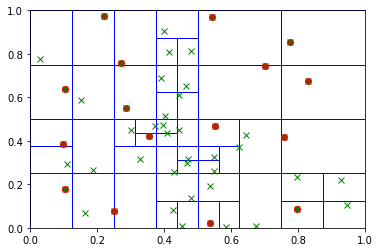

In [12]:
fig3 = strata.plot_2d()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(initial_samples[:, 0], initial_samples[:, 1], 'ro')
plt.plot(z.samplesU01[:, 0], z.samplesU01[:, 1], 'gx')
plt.show()

Krig class is used to generate a surrogate model using final samples from RSS class.

In [13]:
K2 = Kriging(regression_model=Linear(), correlation_model=Exponential(), optimizer=MinimizeOptimizer(method="L-BFGS-B"),
             correlation_model_parameters=K.correlation_model_parameters.tolist())
K2.fit(samples=z.samples, values=rmodel.qoi_list)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55843D+01    |proj g|=  1.81132D-02

At iterate    1    f=  6.55839D+01    |proj g|=  1.44669D-02

At iterate    2    f=  6.55821D+01    |proj g|=  2.23838D-03

At iterate    3    f=  6.55821D+01    |proj g|=  8.50887D-04
True

At iterate    4    f=  6.55821D+01    |proj g|=  3.04709D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      4     0     0   3.047D-06   6.558D+01
  F =   65.582050934264331     

CO

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,


This figure shows the final surrogate model, generated using 200 samples.

<Figure size 432x288 with 0 Axes>

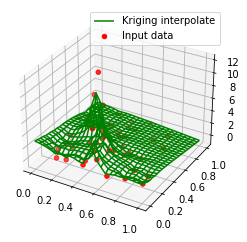

In [14]:
y = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = K2.predict(np.array([x1v[i, j], x2v[i, j]]))

plt.clf()
fig4 = plt.figure()
a4 = fig4.gca(projection='3d')
# Plot for estimated values
kr = a4.plot_wireframe(x1v, x2v, y, color='Green', label='Kriging interpolate')

# Plot for scattered data
ID = a4.scatter3D(z.samples[:, 0], z.samples[:, 1], rmodel.qoi_list, color='Red', label='Input data')
plt.legend(handles=[kr, ID])
plt.show()